# Task: Raggruppamento degli utenti in base alle loro preferenze o comportamento sulla piattaforma;

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [2]:
df_user = pd.read_csv('./dataset/user_dropped.csv')

C:\Users\giuli\AppData\Local\Temp/ipykernel_3912/3686083007.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_user = pd.read_csv('./dataset/user_dropped.csv')


In [3]:
# user_id            // string, 22 character unique user id, maps to the user in user.json
# name               // string, the user's first name
# review_count       // integer, the number of reviews they've written
# yelping_since      // string, when the user joined Yelp, formatted like YYYY-MM-DD
# friends            // array of strings, an array of the user's friend as user_ids
# useful             // integer, number of useful votes sent by the user
# funny              // integer, number of funny votes sent by the user
# cool               // integer, number of cool votes sent by the user
# fans               // integer, number of fans the user has
# elite              // array of integers, the years the user was elite
# average_stars      // float, average rating of all reviews
# compliment_hot     // integer, number of hot compliments received by the user
# compliment_more    // integer, number of more compliments received by the user
# compliment_profile // integer, number of profile compliments received by the user
# compliment_cute    // integer, number of cute compliments received by the user
# compliment_list    // integer, number of list compliments received by the user
# compliment_note    // integer, number of note compliments received by the user
# compliment_plain   // integer, number of plain compliments received by the user
# compliment_cool    // integer, number of cool compliments received by the user
# compliment_funny   // integer, number of funny compliments received by the user
# compliment_writer  // integer, number of writer compliments received by the user
# compliment_photos  // integer, number of photos compliments received by the user

In [4]:
# Drop some rows in order to increment performances

df_user = df_user.iloc[80000:, :]
# df_user = df_user.iloc[99000:, :]
df_user = df_user.reset_index()

In [5]:
df_user.head(10)

,level_0,Unnamed: 0,index,user_id,name,review_count,yelping_since,useful,funny,cool,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,80000,80000,1967897,eRFamSPW1d6_uaJpw_drtg,Ana,6,2017-04-06 18:37:44,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,80001,80001,1967898,jnSFe3rPnaYpNUJcmhwoxQ,Valerie,1,2016-06-25 20:48:59,4,2,0,...,0,0,0,0,0,0,0,0,0,0
2,80002,80002,1967899,Kz3d5l_32qV1wXIltOPvfg,Anne,1,2017-09-25 00:24:08,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,80003,80003,1967900,-FcQ1XVCQkGeMGOR5uW-rw,Kevin,1,2021-12-04 17:36:41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80004,80004,1967901,n7w5uwKLbHTGSDOtWNWuhQ,Anne,1,2015-01-07 20:01:26,9,1,0,...,0,0,0,0,0,0,0,0,0,0
5,80005,80005,1967902,qBF1PH83sE5Irxf5HufdkQ,Bruce,1,2018-07-07 23:12:46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,80006,80006,1967903,gJ7--iglEBRgFroJ6uWrKg,Ran,15,2012-08-18 20:04:49,2,4,0,...,0,0,0,0,0,0,0,0,0,0
7,80007,80007,1967904,25tzfe9sG4jy81rxyLrwLw,Gina,9,2015-02-24 18:12:03,3,1,1,...,0,0,0,0,0,0,0,0,0,0
8,80008,80008,1967905,S_J_Ti-Gks2Fi_KQDiT2fQ,Mike,1,2019-09-09 02:26:16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,80009,80009,1967906,RzcyvSrxMd8qWkgU0Kr3-A,S,11,2012-06-10 05:51:58,16,2,3,...,0,0,0,0,0,0,0,0,0,0


## Average reviews count

Average Positive reviews count: 9169
Average Negative reviews count: 8183


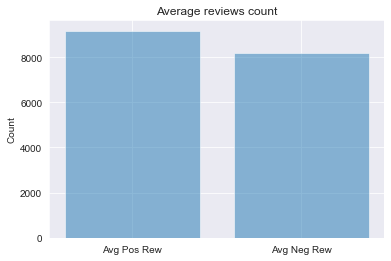

In [6]:
average_positive_reviews_count = (df_user['average_stars'] >= 4).sum()
average_negative_review_count = (df_user['average_stars'] <= 3).sum()

print("Average Positive reviews count:", average_positive_reviews_count)

print("Average Negative reviews count:", average_negative_review_count)

objects = ('Avg Pos Rew', 'Avg Neg Rew')
performance = [average_positive_reviews_count, average_negative_review_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Average reviews count')

plt.show()

## Group user by her/his behavior

## Algorithms


In [7]:
from sklearn.cluster import KMeans

# K-Means

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [9]:
def score_plot_and_get_best(data_frame):
    fitted_kmeans = {}
    labels_kmeans = {}
    df_scores = []
    inertias = []

    number_clusters = np.arange(2, 5)

    for i in number_clusters:
        kmeans = KMeans(n_clusters=i)
        labels_clusters = kmeans.fit_predict(data_frame)
        inertias.append(kmeans.inertia_)

        # Insert fitted model and calculated cluster labels in dictionaries, for further reference.
        fitted_kmeans[i] = kmeans
        labels_kmeans[i] = labels_clusters

        # Calculate various scores, and save them for further reference.
        df_scores.append({
            "n_clusters": i,
            "silhouette_score": silhouette_score(data_frame, labels_clusters),
            "calinski_harabasz_score": calinski_harabasz_score(data_frame, labels_clusters),
            "davies_bouldin_score": davies_bouldin_score(data_frame, labels_clusters),
        }
        )

    # Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index("n_clusters", inplace=True)

    print(df_scores)

    # Plot inertias
    plt.plot(number_clusters, inertias, 'bx-')
    plt.title('Inertias')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    best_scores_list = [
        df_scores["silhouette_score"].idxmax(),
        df_scores["calinski_harabasz_score"].idxmax(),
        df_scores["davies_bouldin_score"].idxmin()
    ]

    best_number_of_cluster = max(set(best_scores_list), key=best_scores_list.count)

    print("Best number of cluster:", best_number_of_cluster)

    return labels_kmeans.get(best_number_of_cluster)

In [10]:
def build_clustered_df(df_cluster, initial_data_frame):
    df_cluster = pd.DataFrame({'cluster': df_cluster})

    initial_data_frame = pd.concat([initial_data_frame, df_cluster], axis=1)

    initial_data_frame.head(50)

    return initial_data_frame

In [11]:
def plot_clusters(data_frame, num_row, num_col, fig_width, fig_height):
    every_combinations = list(combinations(data_frame.drop(columns='cluster').columns, 2))

    figure, axis = plt.subplots(num_row, num_col, figsize=(fig_width, fig_height))

    next_row = 0
    next_column = 0

    for combination in every_combinations:
        first_feature = combination[0]
        second_feature = combination[1]

        axis[next_row, next_column].scatter(
            data_frame[first_feature],
            data_frame[second_feature],
            c=data_frame['cluster'],
            cmap='rainbow'
        )

        axis[next_row, next_column].set_title(first_feature + " and " + second_feature)

        if next_column == (num_col - 1):
            next_row = next_row + 1
            next_column = 0
        else:
            next_column = next_column + 1

## Based on behavior

In [12]:
df_user_behavior_info = df_user[['review_count', 'useful', 'funny', 'cool', 'average_stars']].copy()

df_user_behavior_info.head(5)

,review_count,useful,funny,cool,average_stars
0,6,1,1,1,4.17
1,1,4,2,0,3.00
2,1,0,1,0,2.00
3,1,0,0,0,1.00
4,1,9,1,0,1.00


            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.861961              9176.354559              0.740320
3                   0.858419             11504.096866              0.484570
4                   0.852288             13062.984110              0.367306
Best number of cluster: 4


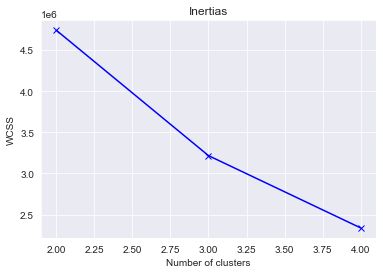

In [13]:
df_cluster = score_plot_and_get_best(df_user_behavior_info)

In [14]:
df_user_behavior_info = build_clustered_df(df_cluster, df_user_behavior_info)

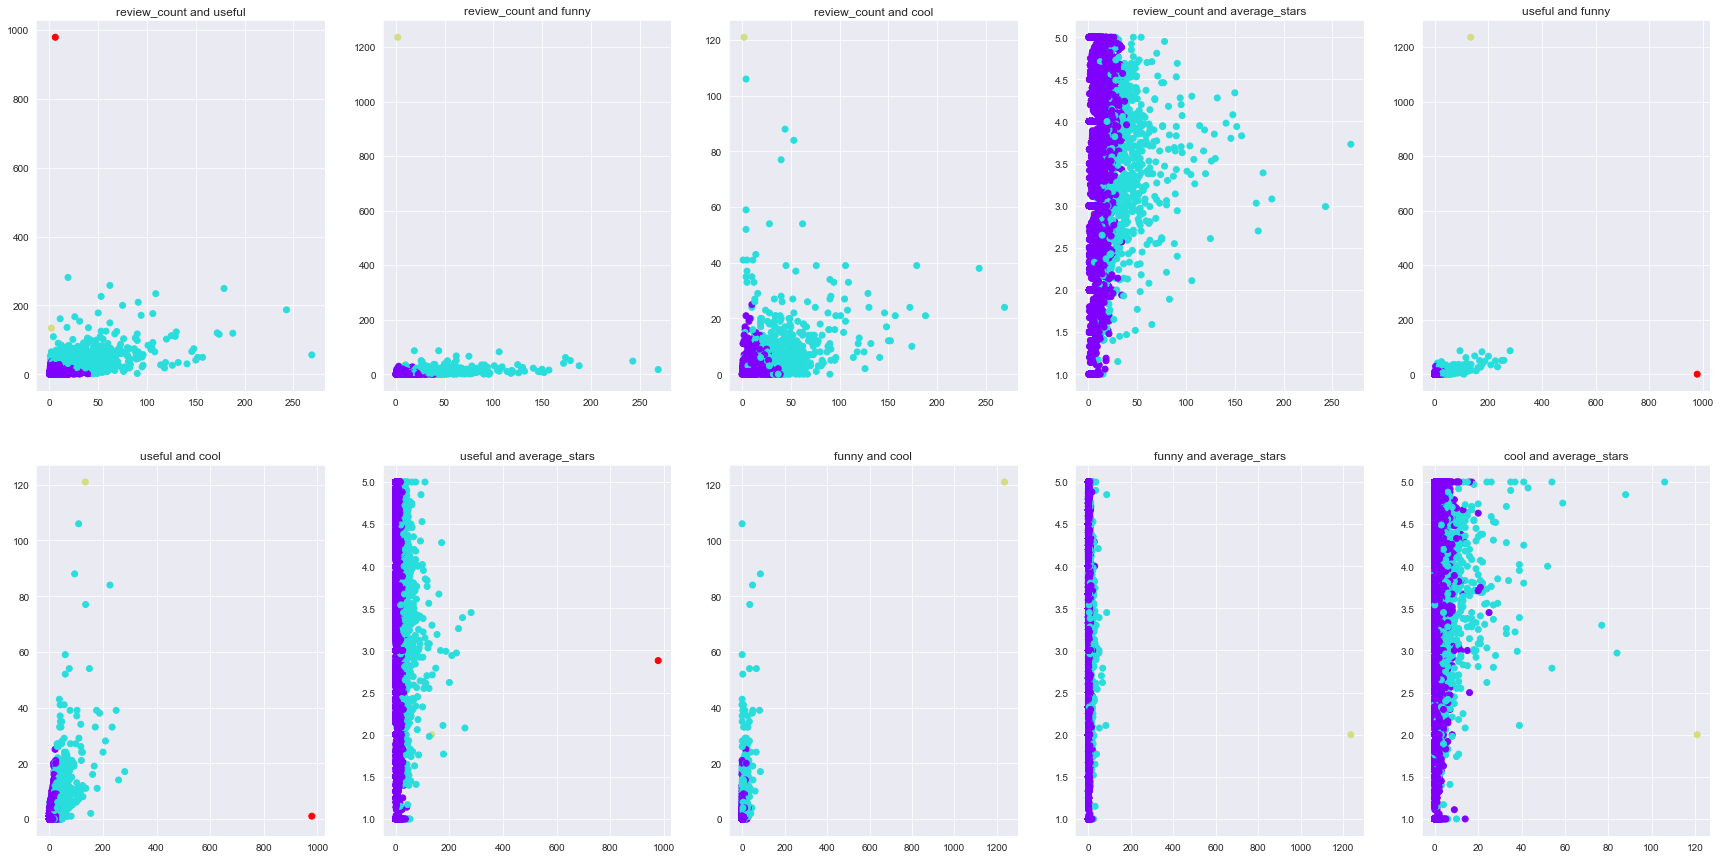

In [15]:
plot_clusters(df_user_behavior_info, 2, 5, 30,15)

## Based on satisfaction

In [16]:
df_user_satisfaction_info = df_user[['compliment_list', 'compliment_cool', 'compliment_writer', 'compliment_funny', 'compliment_hot', 'compliment_cute', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile']].copy()

df_user_satisfaction_info.head(5)

,compliment_list,compliment_cool,compliment_writer,compliment_funny,compliment_hot,compliment_cute,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.993658              7368.354884              0.004790
3                   0.890591              9147.943508              0.529815
4                   0.915587             10367.084776              0.601031
Best number of cluster: 2


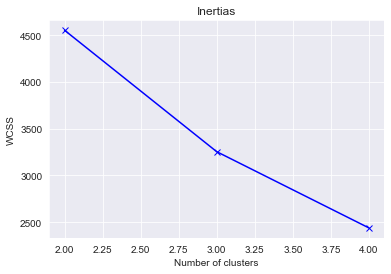

In [17]:
df_cluster = score_plot_and_get_best(df_user_satisfaction_info)

In [18]:
df_user_satisfaction_info = build_clustered_df(df_cluster, df_user_satisfaction_info)

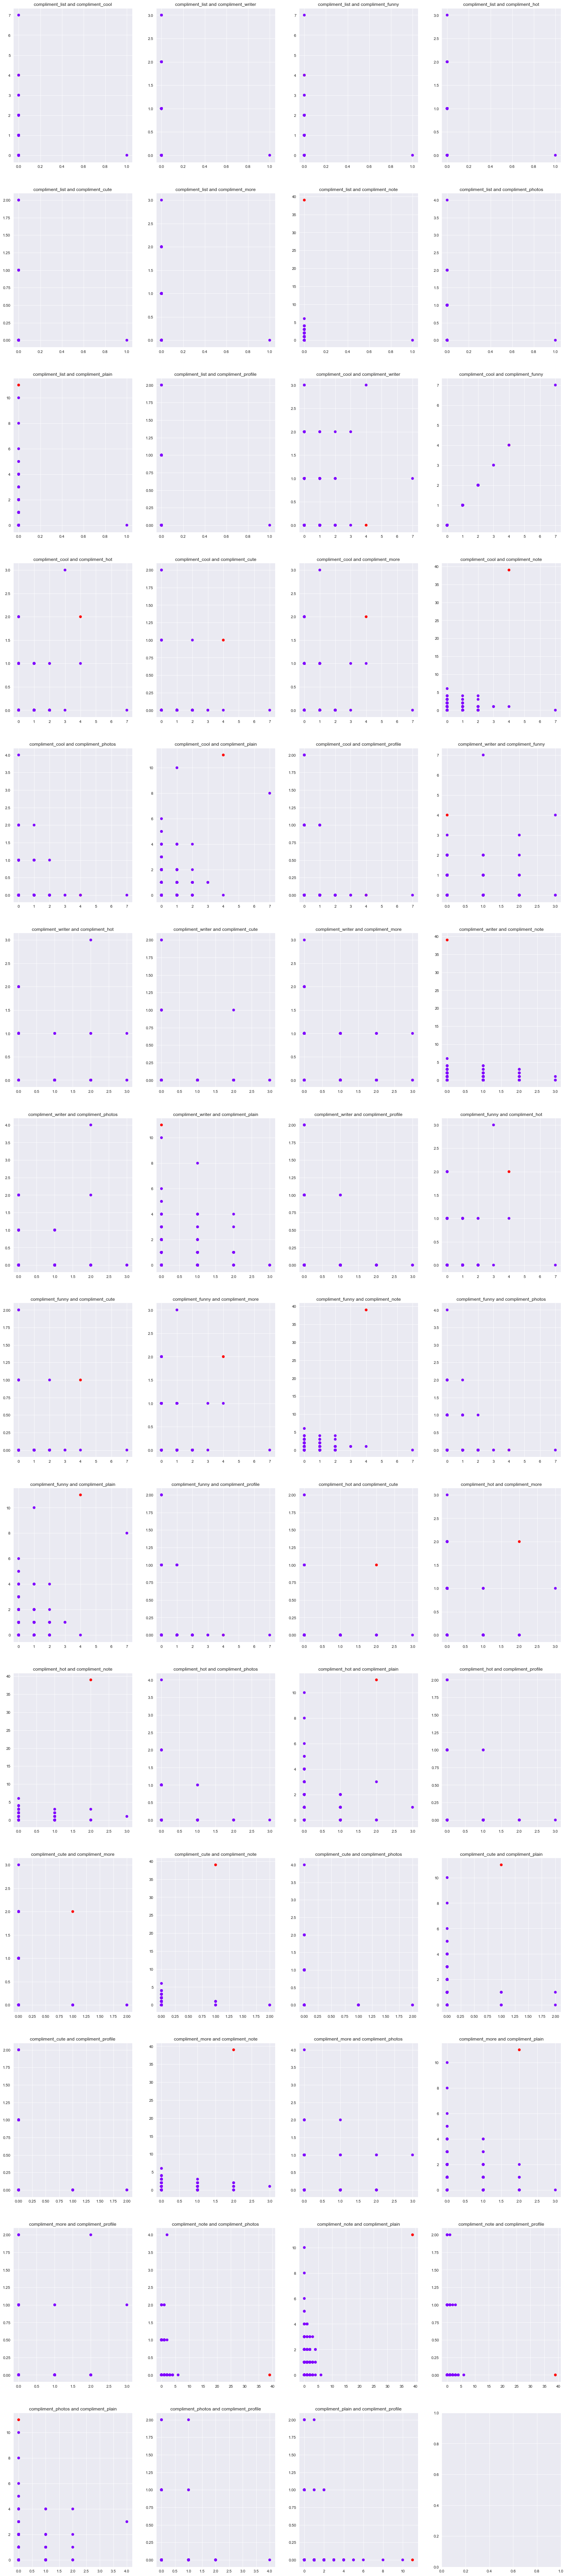

In [19]:
plot_clusters(df_user_satisfaction_info, 14, 4, 25, 120)

# DBSCAN algorithm

## Best parameters for DBSCAN

In [58]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(df_user_behavior_info)
distances, indices = nbrs.kneighbors(df_user_behavior_info)
distances = distances[:,2]
distances = np.sort(distances, axis=0)

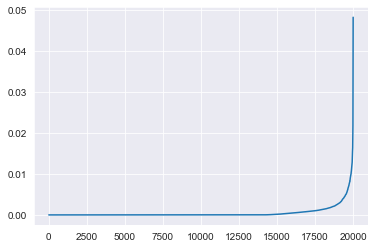

In [59]:
plt.plot(distances)
plt.show()

In [60]:
distances

array([0.        , 0.        , 0.        , ..., 0.03146604, 0.03785953,
       0.04818273])

In [61]:
distances_list = distances.tolist()
# distances_list
print(len(distances_list))

20000


In [62]:
distances_filtered = [x for x in distances_list if x > 0.01]
print(len(distances_filtered))
# distances_filtered

139


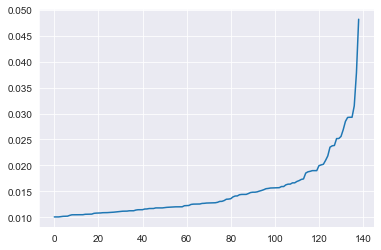

In [63]:
array_distances_filtered = np.array(distances_filtered)
plt.plot(array_distances_filtered)
plt.show()

In [66]:
list_df_distances_filtered = array_distances_filtered.tolist()
distances_filtered = [x for x in array_distances_filtered if 0.030 >= x >= 0.015]
print(len(distances_filtered))
distances_filtered

43


[0.015034209552001188,
 0.01515250745154273,
 0.015306202727283003,
 0.01549300623751082,
 0.01554539634671237,
 0.01562596130230276,
 0.01564426317072487,
 0.015675861711910488,
 0.015675861711910488,
 0.015690867224900207,
 0.015910109699749486,
 0.015910109699749486,
 0.016238723390187282,
 0.016369165665481966,
 0.016378756777058023,
 0.016621656211116775,
 0.016621656211116775,
 0.01688991335282286,
 0.01705362563401891,
 0.017284988551102498,
 0.017377332347908725,
 0.018504542377636102,
 0.018750813935457855,
 0.018844218960787695,
 0.018977056824054817,
 0.018977056824054817,
 0.018981544631847647,
 0.019936623840676404,
 0.02008813012226829,
 0.020204102886728692,
 0.020954535953349174,
 0.021814271183189904,
 0.02349995902564439,
 0.02376335525593376,
 0.023835543952733906,
 0.025161265128323285,
 0.025174026403858574,
 0.025579685405240804,
 0.026876319798096238,
 0.028468730287073418,
 0.029242068896585538,
 0.029274317360868385,
 0.029274317360868385]

In [68]:
no_duplicates_distances = list(dict.fromkeys(distances_filtered))
print(len(no_duplicates_distances))

38


In [69]:
from numpy import unique, where
from sklearn.cluster import DBSCAN

In [70]:
df_scores_dbscan = []
for i in no_duplicates_distances:
    model = DBSCAN(eps=i, min_samples=10)
    # fit model and predict clusters
    label_dbscan = model.fit_predict(df_user_behavior_info)

    df_scores_dbscan.append({
            "eps": i,
            "silhouette_score": silhouette_score(df_user_behavior_info, label_dbscan),
            "calinski_harabasz_score": calinski_harabasz_score(df_user_behavior_info, label_dbscan),
            "davies_bouldin_score": davies_bouldin_score(df_user_behavior_info, label_dbscan),
        })


In [71]:
df_scores_dbscan = pd.DataFrame(df_scores_dbscan)
df_scores_dbscan.set_index("eps", inplace=True)

print(df_scores_dbscan)

best_scores_list_dbscan = [
    df_scores_dbscan["silhouette_score"].idxmax(),
    df_scores_dbscan["calinski_harabasz_score"].idxmax(),
    df_scores_dbscan["davies_bouldin_score"].idxmin()
]

best_eps = max(set(best_scores_list_dbscan), key=best_scores_list_dbscan.count)

print("Best eps:", best_eps)


          silhouette_score  calinski_harabasz_score  davies_bouldin_score
eps                                                                      
0.015034          0.374946                15.417034              1.180457
0.015153          0.374946                15.417034              1.180457
0.015306          0.374946                15.417034              1.180457
0.015493          0.374946                15.417034              1.180457
0.015545          0.374946                15.417034              1.180457
0.015626          0.374946                15.417034              1.180457
0.015644          0.374946                15.417034              1.180457
0.015676          0.374946                15.417034              1.180457
0.015691          0.374946                15.417034              1.180457
0.015910          0.374946                15.417034              1.180457
0.016239          0.374946                15.417034              1.180457
0.016369          0.374946            